<a href="https://colab.research.google.com/github/quetion/time_series_11202/blob/main/%5B5%5D%E5%96%AE%E6%A0%B9%E8%88%87%E9%9A%A8%E6%A9%9F%E8%B6%A8%E5%8B%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

# 隨機漫步模型
- 考慮AR(1)模型
$$
y_t = \beta_0 + \beta_1 y_{t-1} + \epsilon_t
$$
  - 當$|\beta_1|<1$，此為定態序列
  - 當$|\beta_1|>1$，此為爆炸序列
  - 當$|\beta_1|=1$，
  $$
  y_t = \beta_0 +y_{t-1} + \epsilon_t
  $$
  此為`隨機漫步模型(random walk model)`
- 此模型具有平賭序列性質 $E_t(y_t+1) = y_t$


## 如何模擬隨機漫步

In [10]:
rw[:5]

array([-0.26465374,  0.06472598,  3.65414612,  0.14003452, -1.54548961])

In [11]:
rw_1[:5]

array([-0.26465374, -0.19992777,  3.45421835,  3.59425288,  2.04876327])

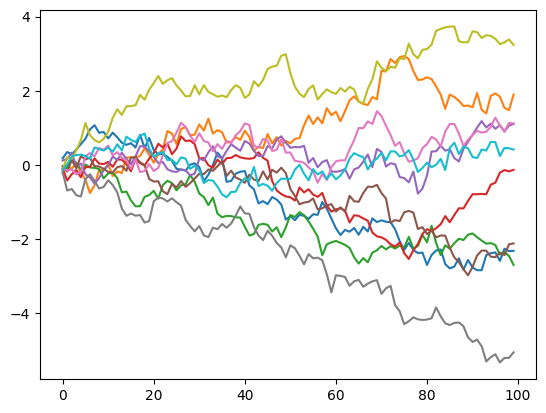

In [13]:
# 生成隨機漫步，長度為100期
for i in range(10):
  sigma = 0.2
  rw = np.random.randn(100)*sigma
  rw_1 = np.cumsum(rw)
  plt.plot(rw_1)

## 隨機漫步是定態的嗎？
- 不是嚴格定態
- 也不是弱定態
- 總體與財務經濟學中，最常用的非定態時間序列模型

# 帶有趨勢的時間序列
- 固定趨勢
$$
y_t = \beta_0 + \beta_1*t + \epsilon_t
$$

- 隨機趨勢

In [43]:
# download data of S&P 500 index
data = yf.download('^gspc',start='2010-01-01')
data = data[['Adj Close']]
data.columns = ['price_spx']
data.head()

[*********************100%%**********************]  1 of 1 completed


,price_spx
Date,
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941
2010-01-08,1144.979980


In [44]:
len(data)

3609

In [45]:
np.arange(len(data))+1

array([   1,    2,    3, ..., 3607, 3608, 3609])

In [46]:
data['time_trend'] = np.arange(len(data))+1

<ipython-input-46-e1a9c0c92152>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_trend'] = np.arange(len(data))+1


In [48]:
data['time2_trend'] = data.time_trend**2

<ipython-input-48-e3a557dee52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time2_trend'] = data.time_trend**2


In [49]:
y = data.price_spx
x = sm.add_constant(data[['time_trend','time2_trend']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:              price_spx   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 3.962e+04
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        03:29:06   Log-Likelihood:                -24819.
No. Observations:                3609   AIC:                         4.964e+04
Df Residuals:                    3606   BIC:                         4.966e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1113.5794     11.729     94.943      

In [50]:
data['price_spx_fitted'] = result.params[0] + result.params[1]*data.time_trend + result.params[2]*data.time2_trend
data['price_spx_detrend'] = data.price_spx - data.price_spx_fitted
data.head()

<ipython-input-50-f045f0910adc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_spx_fitted'] = result.params[0] + result.params[1]*data.time_trend + result.params[2]*data.time2_trend
<ipython-input-50-f045f0910adc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_spx_detrend'] = data.price_spx - data.price_spx_fitted


,price_spx,time_trend,time2_trend,price_spx_fitted,price_spx_detrend
Date,,,,,
2010-01-04,1132.989990,1,1,1113.958705,19.031286
2010-01-05,1136.520020,2,4,1114.338393,22.181627
2010-01-06,1137.140015,3,9,1114.718448,22.421566
2010-01-07,1141.689941,4,16,1115.098871,26.591071
2010-01-08,1144.979980,5,25,1115.479660,29.500320


<Axes: xlabel='Date'>

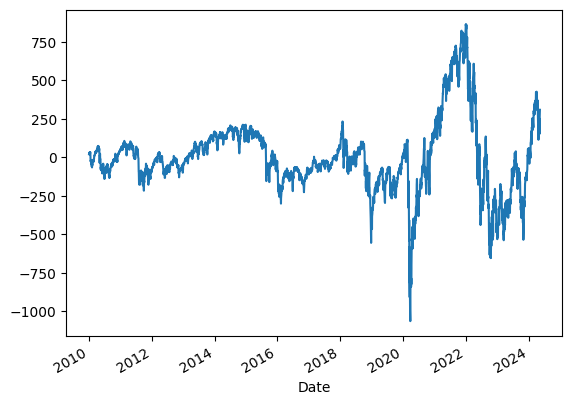

In [51]:
data.price_spx_detrend.plot()

## 單根與隨機趨勢
- 持續且長期性的隨機移動
- 隨機移動就是外生性衝擊
- 每一次的外生性衝擊都會造成長期影響


# 單根所產生的問題
-  小樣本估計的向下偏誤
  - 估計出來的參數通常會被低估
- 虛假回歸
  - 使得原本獨立的兩變數，但透過回歸模型估計，參數居然大概率都會顯著(顯示兩變數存在顯著相關度)



## 估計的向下偏誤

In [52]:
# 生成單根過程
T = 20
sigma = 1
# random simulate variable from Normal distribution
yt = (np.random.randn(T)*sigma).cumsum()
# save as DataFrame
yt = pd.DataFrame(yt)
# rename the variable
yt.columns = ['ar_simu']

In [54]:
yt.head()

,ar_simu
0,1.319620
1,3.286631
2,3.526725
3,2.854567
4,4.041914


In [64]:
res = np.zeros(1000)
for i in range(1000):
  # 生成單根過程
  T = 20
  sigma = 1
  # random simulate variable from Normal distribution
  yt = (np.random.randn(T)*sigma).cumsum()
  # save as DataFrame
  yt = pd.DataFrame(yt)
  # rename the variable
  yt.columns = ['ar_simu']
  # 估計AR(1)
  y = yt.ar_simu
  x = yt.ar_simu.shift()
  result = sm.OLS(y,x,missing='drop').fit()
  res[i] = result.params[0]
  #print(result.summary())
  #print(result.params[0])

In [65]:
res.mean()

0.9126036390575981

In [ ]:
result.pvalues[0]>0.05

False

## 虛假回歸

,x,y
0,-1.366978,0.836948
1,0.535128,0.970356
2,1.917536,0.515665
3,2.000846,0.989033
4,2.086892,1.545706


In [83]:
res = np.zeros(1000)
for i in range(1000):
  # randomly generate x and y under unit-root
  x = np.cumsum(np.random.randn(100))
  y = np.cumsum(np.random.randn(100))
  data = pd.DataFrame(x)
  data['y'] = pd.DataFrame(y)
  data.columns = ['x','y']
  data.head()
  # run the regression
  y = data.y
  x = sm.add_constant(x)
  result = sm.OLS(y,x,missing='drop').fit()
  res[i] = result.pvalues[1]
  #print(result.summary())


In [85]:
prob = (res<0.01).sum()/len(res)
print('虛假回歸發生機率{:.2f}'.format(prob))

虛假回歸發生機率0.67


# 單根檢定
- 由於時間序列存在單根，這可能導致實證上嚴重的錯誤推論(Nelson and Plosser, 1982)
- 檢定時間序列是否存在單根，是一個重要的統計問題
- 自從1970年代開始，許多檢定方法開始被提出
- 目前最常用的檢定 (ADF檢定)



In [93]:
from statsmodels.tsa.stattools import adfuller

# 下載歐元兌美元的匯率資料
data = yf.download("EURUSD=X",start='1990-01-01')

# 選擇收盤價
data = data[['Adj Close']]
data.columns = ['price_eurusd']
#data['diff_eurusd'] = data.price_eurusd.diff()
data.head()



[*********************100%%**********************]  1 of 1 completed


,price_eurusd
Date,
2003-12-01,1.196501
2003-12-02,1.208897
2003-12-03,1.212298
2003-12-04,1.208094
2003-12-05,1.218695


<Axes: xlabel='Date'>

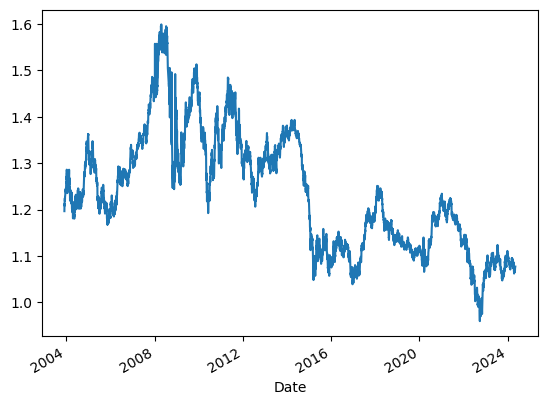

In [94]:
data.price_eurusd.plot()

In [95]:
# ADF檢定
result = adfuller(data.price_eurusd.dropna())

# 輸出ADF檢定結果
print('ADF Statistic: {:.4f}'.format(result[0]))
print('p-value: {:.4f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# 判斷是否為定態序列
if result[0] < result[4]["5%"]:
    print("序列為定態")
else:
    print("序列非定態")


ADF Statistic: -1.8427
p-value: 0.3595
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
序列非定態


# 如何處理時間序列的單根
- 取一階差分 (`.diff()`)

# 單根檢定與總體經濟學
- Ｗhite(1958)發現並討論單根現象
- Ｄickey and Fuller (1979)建立檢定單根的方法
- 財務經濟應用
  - 股價(Weintraub, 1963; Godfrey, Granger, and Morgenstern, 1964)
  - 匯率(Poole, 1967; Upson, 1972)
  - 原物料商品期貨價格(Stevenson and Bear, 1970)
- 將單根檢定應用於美國總體變數的第一人，Nelson and Plosser (1982)
- Journal of Monetary Economics "Trends and Random Walks in Macroeconomic Time Series"